In [1]:
%load_ext autoreload
%autoreload 2

In [15]:
import numpy as np
import pandas as pd
import ej2
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [3]:
test_data = pd.read_csv("alturas-pesos-mils-test.csv")
train_data = pd.read_csv("alturas-pesos-mils-train.csv")

[x.drop(columns=["Unnamed: 0"], inplace=True) for x in (test_data, train_data)]

seg_data = ej2.segregate(train_data)
tst_seg_data = ej2.segregate(test_data)

[print(x[0].format(x[1].mean())) for x in (("MeanWomen: {}", seg_data["f"]),("MeanMen: {}", seg_data["m"]))]

MeanWomen: Peso       61.137895
Altura    161.304713
dtype: float64
MeanMen: Peso       84.455398
Altura    174.915330
dtype: float64


[None, None]

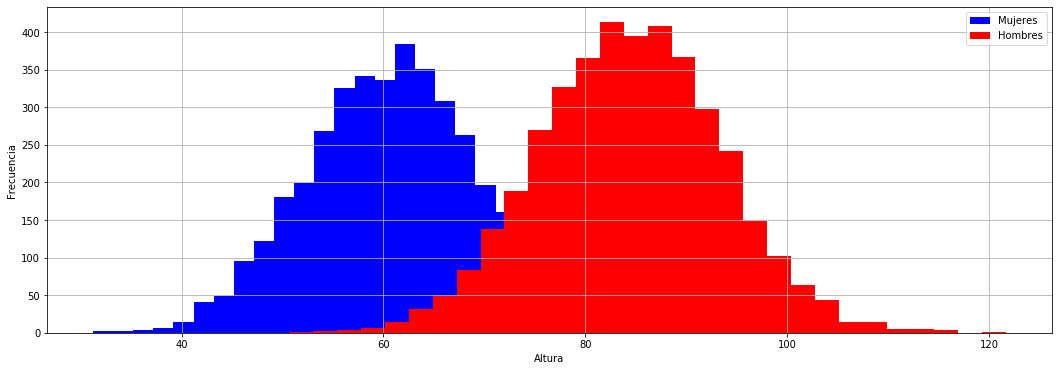

In [4]:
chart = plt.figure(figsize=[18,6])
ax = plt.gca()

seg_data["f"["Peso"].hist(bins=30,ax=ax,color='b',label="Mujeres")
gen_data[1]["Peso"].hist(bins=30,ax=ax,color='r',label="Hombres")

plt.xlabel("Altura")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

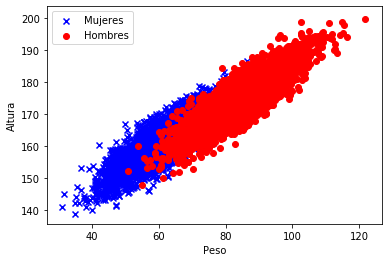

In [5]:
# plt.figure(figsize=[9,9])

plt.scatter(seg_data["f"]["Peso"], seg_data["f"]["Altura"], color='b',label="Mujeres",marker="x")
plt.scatter(seg_data["m"]["Peso"], seg_data["m"]["Altura"], color='r',label="Hombres",marker="o")

plt.legend()
plt.xlabel("Peso")
plt.ylabel("Altura")
plt.show()

In [26]:
%%time
# xy axis ranges for the train data
ranges = [[train_data["Peso"].min(), train_data["Peso"].max()], [train_data["Altura"].min(), train_data["Altura"].max()]]
# generate random splits to find optimal bin size
# TODO: same split for both genders!!!
splitf, _ = train_test_split(seg_data["f"], test_size=0.30)
splitm, _ = train_test_split(seg_data["m"], test_size=0.30)
# accuracy by (xbinsize,ybinsize) configuration    
accuracies_by_bin = {}
# test reasonable amount of bins or it takes forever!
for x in range(5,15):
    for y in range(5,15):
        hits = 0
        # generate histograms for each gender
        train_sets = [ej2.train_data_for(splitf, "Mujer", ranges, x, y), 
                      ej2.train_data_for(splitm, "Hombre", ranges, x, y)]
        for i, row in test_data.iterrows():
            actual_gender = row["Genero"]
            # let the model figure out the gender
            r = ej2.eval_model_for(train_sets, row, x, y)
            if (actual_gender == r):
                # model guessed the correct gender, hit!
                hits = hits + 1
        accuracies_by_bin[(x,y)] =  hits / len(test_data)
# flatten the dictionary and order accuracies in descending order
ordered_accuracies = [(value, key) for key, value in accuracies_by_bin.items()]
ordered_accuracies.sort(key=lambda x: -x[0])
print("Top bin sizes: ")
print(ordered_accuracies[:5])
print("Best bin size: ")
print(max(ordered_accuracies))

Top bin sizes: 
[(0.912, (13, 7)), (0.912, (13, 10)), (0.912, (13, 11)), (0.9115, (13, 8)), (0.911, (13, 5))]
Best bin size: 
(0.912, (13, 11))
CPU times: user 26.5 s, sys: 3 µs, total: 26.5 s
Wall time: 26.5 s
